In [1]:
import pandas as pd
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
results_df = pd.read_csv('results_df_selector_3.csv')
results_df = results_df.drop('model_args', axis = 1)
results_df.loc[results_df['model_name'] == 'extremelyfastdecisiontreeclassifier', 'model_name'] = 'EFDT'
results_df.loc[results_df['model_name'] == 'hoeffdingtreeclassifier', 'model_name'] = 'HT'

In [21]:
results_df

,model_name,drift_name,feature_selector_name,num_features,learning_threshold,iteration,accuracy,drifts_detected,ticker
0,nochange,adwin,selectkbest,5,500,1,0.501,0,AAPL
1,nochange,adwin,selectkbest,5,500,2,0.501,0,AAPL
2,nochange,adwin,selectkbest,5,500,3,0.501,0,AAPL
3,nochange,adwin,selectkbest,5,500,4,0.501,0,AAPL
4,nochange,adwin,selectkbest,5,500,5,0.501,0,AAPL
...,...,...,...,...,...,...,...,...,...
795,EFDT,bollingerband,tstat,20,500,1,0.516,8,AAPL
796,EFDT,bollingerband,tstat,20,500,2,0.516,8,AAPL
797,EFDT,bollingerband,tstat,20,500,3,0.516,8,AAPL
798,EFDT,bollingerband,tstat,20,500,4,0.516,8,AAPL


In [22]:
results_df.sort_values(by = 'accuracy', ascending = False).head(10)

,model_name,drift_name,feature_selector_name,num_features,learning_threshold,iteration,accuracy,drifts_detected,ticker
233,majorityclass,pagehinkley,tstat,5,500,4,0.527,1,AAPL
333,majorityclass,pagehinkley,selectkbest,15,500,4,0.527,1,AAPL
354,majorityclass,pagehinkley,tstat,15,500,5,0.527,1,AAPL
353,majorityclass,pagehinkley,tstat,15,500,4,0.527,1,AAPL
352,majorityclass,pagehinkley,tstat,15,500,3,0.527,1,AAPL
351,majorityclass,pagehinkley,tstat,15,500,2,0.527,1,AAPL
350,majorityclass,pagehinkley,tstat,15,500,1,0.527,1,AAPL
270,majorityclass,pagehinkley,tstat,7,500,1,0.527,1,AAPL
271,majorityclass,pagehinkley,tstat,7,500,2,0.527,1,AAPL
272,majorityclass,pagehinkley,tstat,7,500,3,0.527,1,AAPL


In [27]:
results_df[(results_df['accuracy'] == 0.527) & (results_df['iteration'] == 1)].drop('iteration', axis = 1)

,model_name,drift_name,feature_selector_name,num_features,learning_threshold,accuracy,drifts_detected,ticker
210,majorityclass,pagehinkley,selectkbest,5,500,0.527,1,AAPL
230,majorityclass,pagehinkley,tstat,5,500,0.527,1,AAPL
250,majorityclass,pagehinkley,selectkbest,7,500,0.527,1,AAPL
270,majorityclass,pagehinkley,tstat,7,500,0.527,1,AAPL
290,majorityclass,pagehinkley,selectkbest,10,500,0.527,1,AAPL
310,majorityclass,pagehinkley,tstat,10,500,0.527,1,AAPL
330,majorityclass,pagehinkley,selectkbest,15,500,0.527,1,AAPL
350,majorityclass,pagehinkley,tstat,15,500,0.527,1,AAPL
370,majorityclass,pagehinkley,selectkbest,20,500,0.527,1,AAPL
390,majorityclass,pagehinkley,tstat,20,500,0.527,1,AAPL


In [4]:
sqldf('''

select model_name
from results_df
group by model_name

''')

,model_name
0,EFDT
1,HT
2,majorityclass
3,nochange


### MODELS OVERVIEW

In [5]:
results_df['model_and_selector'] = results_df['model_name'] + ' + ' + results_df['feature_selector_name']
results_df['drift_and_selector'] = results_df['drift_name'] + ' + ' + results_df['feature_selector_name']

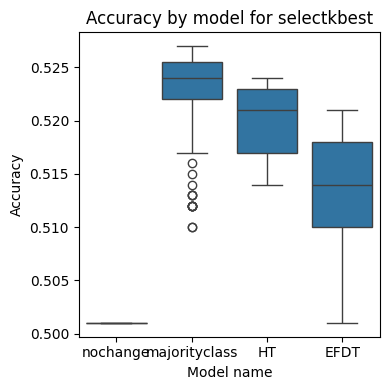

In [6]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='model_name', y="accuracy", data=results_df[results_df['feature_selector_name']=='selectkbest'])
plt.title("Accuracy by model for selectkbest")
plt.xlabel("Model name")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

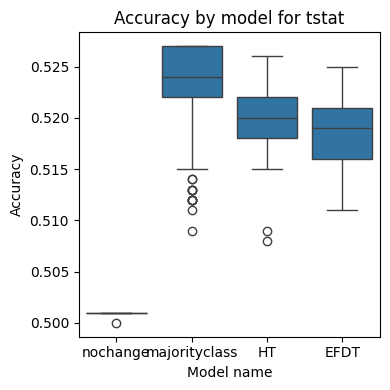

In [7]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='model_name', y="accuracy", data=results_df[results_df['feature_selector_name']=='tstat'])
plt.title("Accuracy by model for tstat")
plt.xlabel("Model name")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

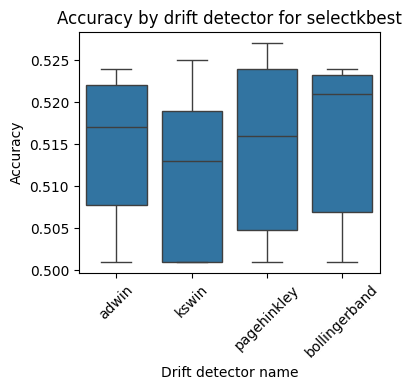

In [8]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='drift_name', y="accuracy", data=results_df[results_df['feature_selector_name']=='selectkbest'])
plt.title("Accuracy by drift detector for selectkbest")
plt.xticks(rotation=45)
plt.xlabel("Drift detector name")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

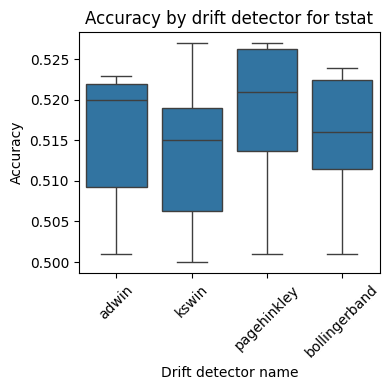

In [9]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='drift_name', y="accuracy", data=results_df[results_df['feature_selector_name']=='tstat'])
plt.title("Accuracy by drift detector for tstat")
plt.xticks(rotation=45)
plt.xlabel("Drift detector name")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

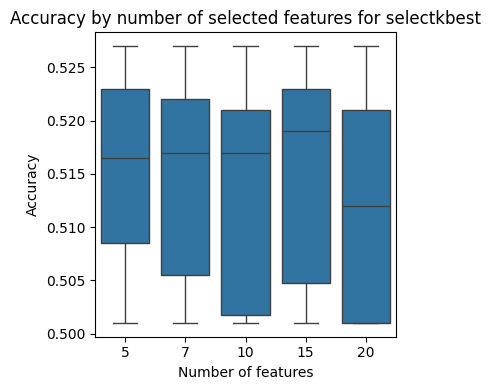

In [10]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='num_features', y="accuracy", data=results_df[results_df['feature_selector_name']=='selectkbest'])
plt.title("Accuracy by number of selected features for selectkbest")
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

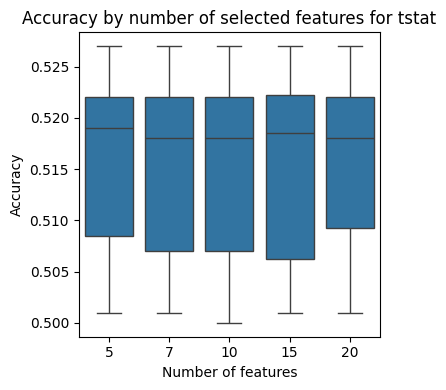

In [11]:
plt.figure(figsize=(4, 4))
sns.boxplot(x='num_features', y="accuracy", data=results_df[results_df['feature_selector_name']=='tstat'])
plt.title("Accuracy by number of selected features for tstat")
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()